In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv("Classified Data", index_col=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [10]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [11]:
len(df.columns)

11

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [18]:
df_normalizado = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [20]:
df_param = pd.DataFrame(df_normalizado, columns=df.columns[:-1])

In [21]:
df_param.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn =  KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       143
           1       0.94      0.95      0.94       157

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [42]:
print(confusion_matrix(y_test, pred))

[[133  10]
 [  8 149]]


In [43]:
error_rate = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

In [44]:
error_rate

[0.11666666666666667,
 0.11666666666666667,
 0.08,
 0.07666666666666666,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.05,
 0.06,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.056666666666666664,
 0.06,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.06,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06,
 0.06,
 0.06]

Text(0, 0.5, 'Taxa de erro.')

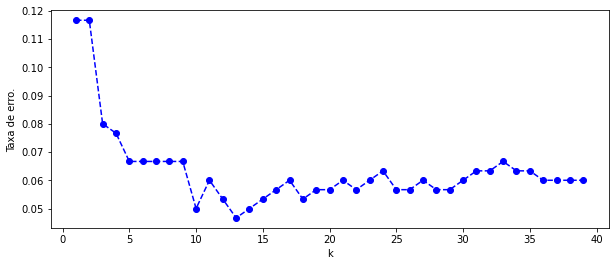

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('k')
plt.ylabel('Taxa de erro.')

In [49]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       143
           1       0.94      0.95      0.95       157

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

